# Lab: Logistic Regression for Gene Expression Data

# Load the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing

In [2]:
df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls", index_col = 0)
df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
MouseID,,,,,,,,,,,,,,,,,,,,,
309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [3]:
df1 = df.fillna(df.mean())
print(df1.head())

         DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
MouseID                                                                         
309_1    0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
309_2    0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
309_3    0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
309_4    0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
309_5    0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   

         pCAMKII_N   pCREB_N    pELK_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
MouseID                                 ...                                  
309_1     2.373744  0.232224  1.750936  ...  0.108336  0.427099   0.114783   
309_2     2.292150  0.226972  1.596377  ...  0.104315  0.441581   0.111974   
309_3     2.283337  0.230247  1.561316  ...  0.106219  0.435777   0.111883   
309_4     2.152301  0.207004  1.595086  ..

# Binary Classification for Down's Syndrome

In [4]:
y_value = df1['Genotype'].values
u, y = np.unique(y_value, return_inverse = True) 
print(y.shape)

(1080,)


In [5]:
xnames = list(df1.columns.values[0:-4]) 
X = np.array(df1)[:, 0:-4]
print(X.shape)

(1080, 77)


In [6]:
from sklearn.model_selection import train_test_split
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [7]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
Xtr1 = scaler.fit_transform(Xtr)
Xts1 = scaler.transform(Xts)

In [8]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C = 1e5, solver = 'liblinear', random_state = 0) 
logreg.fit(Xtr1, ytr)

LogisticRegression(C=100000.0, random_state=0, solver='liblinear')

In [9]:
yhat = logreg.score(Xts1, yts) 
print(yhat)

0.9660493827160493


# Interpreting the weight vector

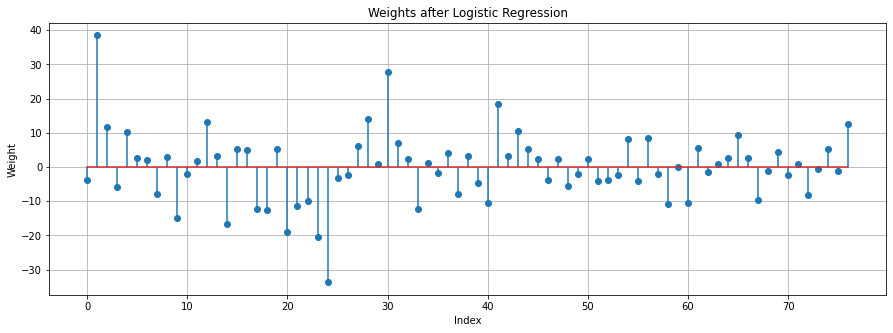

In [10]:
W = logreg.coef_.reshape(-1, 1)
plt.figure(figsize=(15,5))
plt.stem(W)
plt.xlabel('Index')
plt.ylabel('Weight')
plt.title('Weights after Logistic Regression')
plt.grid()

In [11]:
max1, max2 = abs(W[:,0]).argsort(axis=0)[0:2]
print('Names of the TWO most likely genes are', df.columns[max1], '     and    ', df.columns[max2])

Names of the TWO most likely genes are GluR4_N      and     H3AcK18_N


# Cross Validation

In [12]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support
nfold = 10
kf = KFold(n_splits=nfold,shuffle=True)
X1 = preprocessing.scale(X)
prec = []
rec = []
f1 = []
acc = []
for train, test in kf.split(X):            
    Xtr = X[train,:]
    ytr = y[train]
    Xts = X[test,:]
    yts = y[test]
    logreg.fit(Xtr, ytr)
    yhat = logreg.predict(Xts)
    preci,reci,f1i,_= precision_recall_fscore_support(yts,yhat,average='binary') 
    prec.append(preci)
    rec.append(reci)
    f1.append(f1i)
    acci = np.mean(yhat == yts)
    acc.append(acci)
precm = np.mean(prec)
recm = np.mean(rec)
f1m = np.mean(f1)
accm= np.mean(acc)

prec_se = np.std(prec)/np.sqrt(nfold-1)
rec_se = np.std(rec)/np.sqrt(nfold-1)
f1_se = np.std(f1)/np.sqrt(nfold-1)
acc_se = np.std(acc)/np.sqrt(nfold-1)

print('Precision = {0:.4f}, SE={1:.4f}'.format(precm,prec_se))
print('Recall =    {0:.4f}, SE={1:.4f}'.format(recm, rec_se))
print('f1 =        {0:.4f}, SE={1:.4f}'.format(f1m, f1_se))
print('Accuracy =  {0:.4f}, SE={1:.4f}'.format(accm, acc_se))

Precision = 0.9499, SE=0.0088
Recall =    0.9553, SE=0.0095
f1 =        0.9520, SE=0.0050
Accuracy =  0.9556, SE=0.0041


# Multi-Class Classification

In [13]:
y = np.unique(df1['class'].values, return_inverse=True)[1]

In [14]:
logreg = linear_model.LogisticRegression(C=1e5) 
logreg.fit(X1, y)

LogisticRegression(C=100000.0)

In [15]:
yhat = logreg.predict(X1)
multiclass_acc = np.mean(yhat == y)
print('Accuracy: ', str(multiclass_acc))

Accuracy:  1.0


In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

nfold = 10
kfold = KFold(n_splits=nfold, shuffle=True)
C = []
for train, test in kfold.split(X1):
    
    kfold_Xtr = X1[train]
    kfold_ytr = y[train]
    kfold_Xts = X1[test]
    kfold_yts = y[test]
    
    kfold_logreg = LogisticRegression(C = 1, multi_class = "ovr")
    kfold_logreg.fit(kfold_Xtr, kfold_ytr)
    
    kfold_yhat = kfold_logreg.predict(kfold_Xts)
    confusion = confusion_matrix(kfold_yts, kfold_yhat)
    C.append(confusion)
Cs = np.array(C).sum(axis=0)

from sklearn.preprocessing import normalize
Cn = normalize(Cs, axis=1)
print(np.array_str(Cn, precision=4, suppress_small=True))

[[0.9997 0.0207 0.     0.     0.0138 0.     0.     0.    ]
 [0.     0.9999 0.     0.     0.0075 0.0075 0.     0.    ]
 [0.     0.     1.     0.     0.     0.     0.     0.    ]
 [0.0075 0.     0.     1.     0.     0.     0.     0.    ]
 [0.0075 0.0075 0.     0.     0.9999 0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     1.    ]]


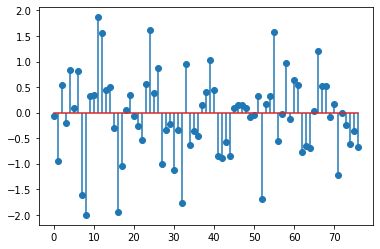

In [17]:
rerun_logreg = LogisticRegression(C = 1, multi_class = "ovr")
rerun_logreg.fit(X1, y)
plt.stem(rerun_logreg.coef_[0])
plt.show()

# L1-Regularization